In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# read in data
retail_df = pd.read_csv('../original_retail_datasets/features_dataset.csv', parse_dates=['Date'], dayfirst=True)
retail_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
# check columns
retail_df.columns.tolist()

['Store',
 'Date',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday']

In [4]:
# total number of rows
print(f'There are a total of',len(retail_df),'rows.')

There are a total of 8190 rows.


In [5]:
# data types of columns
retail_df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [6]:
# change date column to MM/DD/YYYY
retail_df["Date"] = pd.to_datetime(retail_df["Date"]).dt.strftime('%m/%d/%Y')
retail_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,02/05/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,02/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,02/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,02/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,03/05/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
# new dataframe with no null values
retail_df2 = retail_df.dropna()
retail_df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,11/18/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,11/25/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,12/02/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,12/09/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


In [8]:
# number of rows with no null values
print(f'There are',len(retail_df2), 'rows without null values.')

There are 2069 rows without null values.


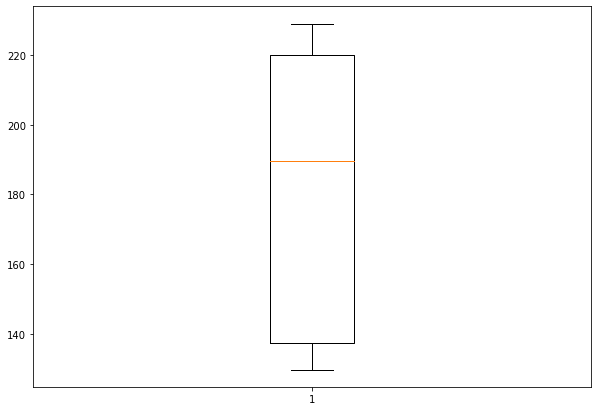

In [9]:
# plot of CPI using dataframe with no null values
fig = plt.figure(figsize =(10, 7))
# Creating plot
plt.boxplot(retail_df2['CPI'])
# show plot
plt.show()

In [ ]:
# export cleaned csv file
#retail_df2.to_csv('../cleaned_datasets/features_data_clean.csv')